## 손실 함수
- X,Y  : 모델 파라미터 W 를 구성하는 변수
- Z : 주어진 파라미터에 대응하는 손실값 (오차)
- Loss = Z(W) = Z(X,Y)

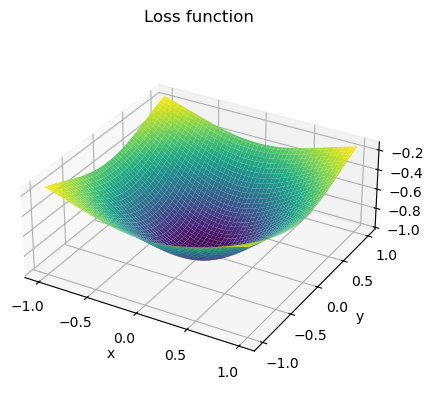

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def loss_fn(x, y):
    z = -1 * np.exp(-1 * (x ** 2) -1 * (y ** 2))
    return z

def plot_loss_fn():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = loss_fn(X, Y)
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_aspect('equal')
    ax.set_title("Loss function")
    return fig, ax

_, _ = plot_loss_fn()
plt.show()

## 경사하강법
모델의 오차를 최소로 만드는 학습 알고리즘
1. 모델 파라미터 무작위 초기화
2. 학습 데이터를 넣고 모델을 실행한 결과 y를 반환
3. 손실 함수를 y에 대하여 편미분 → 파라미터 기울기 계산
4. 오차가 줄어드는 방향으로 파라미터 조정
5. step 2 로 돌아가 오차가 충분히 작아질 때까지 반복

MovieWriter imagemagick unavailable; using Pillow instead.


Rendering frame #0
Rendering frame #0
Rendering frame #1
Rendering frame #2
Rendering frame #3
Rendering frame #4
Rendering frame #5
Rendering frame #6
Rendering frame #7
Rendering frame #8
Rendering frame #9
Rendering frame #10
Rendering frame #11
Rendering frame #12
Rendering frame #13
Rendering frame #14
Rendering frame #15
Rendering frame #16
Rendering frame #17
Rendering frame #18
Rendering frame #19
Rendering frame #20
Rendering frame #21
Rendering frame #22
Rendering frame #23
Rendering frame #24
Rendering frame #25
Rendering frame #26
Rendering frame #27
Rendering frame #28
Rendering frame #29
Rendering frame #30
Rendering frame #31
Rendering frame #32
Rendering frame #33
Rendering frame #34
Rendering frame #35
Rendering frame #36
Rendering frame #37
Rendering frame #38
Rendering frame #39
Rendering frame #40
Rendering frame #41
Rendering frame #42
Rendering frame #43
Rendering frame #44
Rendering frame #45
Rendering frame #46
Rendering frame #47
Rendering frame #48
Rendering f

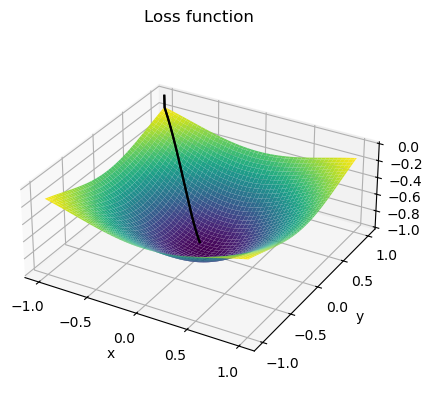

In [175]:
from matplotlib import animation


def partial_loss_fn(x, y):
    grad_x = 2 * x * np.exp(-1 * (x ** 2) -1 * (y ** 2))
    grad_y = 2 * y * np.exp(-1 * (x ** 2) -1 * (y ** 2))
    return grad_x, grad_y

def optimize_step(x, y, lr):
    grad_x, grad_y = partial_loss_fn(x, y)
    x = x - lr * grad_x
    y = y - lr * grad_y
    return x, y

def update(frame, line, Wh, X, Y, Z):
    x = Wh[0, frame]
    y = Wh[1, frame]
    z = Wh[2, frame]
    X.append(x)
    Y.append(y)
    Z.append(z)
    line.set_data_3d(X, Y, Z)
    print(f"Rendering frame #{frame}")

def gradient_descent(W, epoch, lr):
    fig, ax = plot_loss_fn()
    pad = np.zeros(shape=(W.shape[0], epoch - 1), dtype=np.float64)
    Wh = np.concatenate((np.expand_dims(W, axis=1), pad), axis=1)
    for i in range(epoch - 1):
        x, y = optimize_step(x=Wh[0, i], y=Wh[1, i], lr=lr)
        z = loss_fn(x, y)
        Wh[0, i+1] = x
        Wh[1, i+1] = y
        Wh[2, i+1] = z
    X, Y, Z = [], [], []
    line, = ax.plot(X, Y, Z, color="black", zorder=100)
    ani = animation.FuncAnimation(
        fig=fig, func=update, frames=epoch, fargs=(line, Wh, X, Y, Z), interval=50
    )
    ani.save("animation.gif", writer="imagemagick")
    plt.plot(X, Y, Z, color="black", zorder=100)
    plt.show()


# Hyper parameters
W = np.array([-1, 1, 0])
epoch = 210
learning_rate = 0.01

gradient_descent(W, epoch, learning_rate)